#### you need `data.csv` file to run this 

## Model Training

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Change the directory to main folder
%cd /content/drive/'My Drive'/SA_amazon18

/content/drive/My Drive/SA_amazon18


In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time

### Assuming we have preprocessed and cleaned data from [amazon review dataset](https://nijianmo.github.io/amazon/index.html#subsets) 
#### Here, we have taken almost 3.75 lacks reviews from different different categories

In [4]:
# load the csv file and split in test and train cases
data = pd.read_csv('data.csv')

X_train, X_test, Y_train, Y_test = train_test_split(data['cleaned_data'], 
                                                    data['overall'], 
                                                    test_size=0.25, 
                                                    random_state=0)

X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')

In [5]:
data.shape

(372392, 3)

In [6]:
# Define the model and its parameters

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()),
                               ("tfidf", TfidfTransformer()), 
                               ("clf_linearSVC", LinearSVC())])

gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)

# classifier_liblinear = gs_clf_LinearSVC_pipe
t0 = time.time()

gs_clf_LinearSVC_pipe.fit(X_train, Y_train)

t1 = time.time()


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [7]:
print("Time taken to train the model", (t1-t0)/60 ,"min.")

Time taken to train the model 14.826843059062957 min.


In [8]:
#save the model
from joblib import dump

dump(gs_clf_LinearSVC_pipe, 'count_tf_gs.joblib')

['count_tf_gs.joblib']

In [9]:
#Check with testing score

prediction = gs_clf_LinearSVC_pipe.predict(X_test)
report = classification_report(prediction, Y_test,output_dict=True )
print(classification_report(prediction, Y_test))

              precision    recall  f1-score   support

         neg       0.82      0.76      0.79     37109
         neu       0.48      0.61      0.54     18558
         pos       0.89      0.83      0.86     37431

    accuracy                           0.76     93098
   macro avg       0.73      0.73      0.73     93098
weighted avg       0.78      0.76      0.77     93098



In [10]:
neg_prc = report['neg']['precision']
neu_prc = report['neu']['precision']
pos_prc = report['pos']['precision']

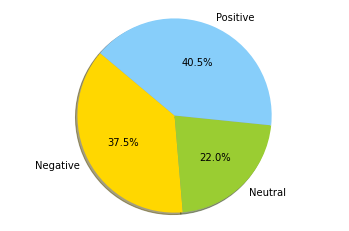

In [11]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Negative', 'Neutral', 'Positive'
sizes = [neg_prc, neu_prc, pos_prc]
colors = ['gold', 'yellowgreen', 'lightskyblue']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Model Loading

In [12]:
ls

count_tf_gs.joblib  data_preprocessing.ipynb        preprocess.py
data/               final_data.csv                  temp/
data.csv            model_generation_loading.ipynb


In [ ]:
from joblib import load
model = load('count_tf_gs.joblib') 

In [ ]:
model

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        p

In [ ]:
# test_mt = ["This is good","This is bad", "Don't work", "That is awesome!"]

test_mt = []

n = int(input("How many reviews ? "))
for i in range(n):
	test_mt.append(input())


ans = model.predict(test_mt)
print("----------------------------------")
print(ans)

How many reviews ? 2
I like this product because its very comfortable to use while sleeping
Packing is not good, also I found demanaged product
----------------------------------
['pos' 'neg']
